# ResNet 구현

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 로드

In [0]:
from tensorflow import keras
import tensorflow as tf

data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [0]:
test_labels = test_labels.reshape(-1,1)
train_labels = train_labels.reshape(-1,1)

In [0]:
import numpy as np
import pandas as pd

def shuffleData(images, labels):
  tmp = np.concatenate([images.reshape(-1,28*28),labels],axis=1)
  tmpd = pd.DataFrame(tmp).sample(frac=1)
  ret = tmpd.values.reshape(-1,785)
  retImg = ret[:,:-1].reshape(-1,28,28)
  retlab = ret[:,-1].reshape(-1,1)
  return retImg, retlab

## 실제 구현

In [0]:
def myResNet(data,)

# Baysian Filter 구현 W/O library

In [0]:
# konlpy 설치
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

import jpype
print(jpype.isJVMStarted())

import nltk
from nltk.tokenize import word_tokenize

nltk.download("popular")

from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [65.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.

Using TensorFlow backend.


In [0]:
from konlpy.tag import Okt

class BayesianFilter:
  
  def __init__(self):
    self.words = set() # 단어 저장
    self.word_dict = {} # 카테고리 단어 빈도수
    self.category_dict = {} # 카테고리(광고 / 중요) 단어 빈도수
  def split(self, text): # 어미/조사/구두점 제외, 형태소 분석
    result = []
    okt = Okt()
    malist = okt.pos(text, norm=True, stem=True)
    for word in malist:
      exceptlist = ["Josa", "Eomi", "Punctuation"]
      # 조사, 어미, 구두점 제외한 나머지 단어만 result에 저장
      if word[1] not in exceptlist:
        result.append(word[0])
    return result
  def inc_word(self, word, category):
    # 단어를 카테고리에 추가
    if not category in self.word_dict:
      self.word_dict[category] = {} # {'광고':{}}
    if not word in self.word_dict[category]:
      self.word_dict[category][word] = 0 # {'광고':{'파격':0}}
    self.word_dict[category][word] += 1 # {'광고':{'파격':1}}
    self.words.add(word) # 

  def inc_category(self, category):
    if not category in self.category_dict:
      self.category_dict[category] = 0
    self.category_dict[category] += 1
    
  # 예측
  def predict(self, text):
    pred_word_list = self.split(text)
    ansdict = {}
    tot_num = 0
    for category in self.category_dict.keys():
      tot_num += self.category_dict[category]
    for category in self.category_dict.keys():
      score_by_cat = 1
      for word in pred_word_list:
        if word not in self.word_dict[category]:
          freq = 1
        else :
          freq = self.word_dict[category][word]
        score_by_cat *= (freq / self.category_dict[category])
      ansdict[category] = score_by_cat * (self.category_dict[category]/tot_num)
    anslist = list(ansdict.items()) # enum list처럼 쓸 수 있음
    anslist.sort(key=lambda x:x[1], reverse=True)
    res = anslist[0][0]
    scorelist = anslist
    
    return res, scorelist
    
  def fit(self, text, category):
    word_list = self.split(text)
    for word in word_list:
      self.inc_word(word, category)
    self.inc_category(category)

In [0]:
bf = BayesianFilter()
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("무료 쿠폰 선물 & 무료 배송", "광고")
bf.fit("아사히 맥주 세일", "광고")
bf.fit("회의 일정 확인 부탁드립니다", "중요")
bf.fit("오늘 일정이 없습니다", "중요")
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
res, scorelist = bf.predict("재고 정리 할인, 무료 배송")
print("결과 : ", res)
print(scorelist)

결과 :  광고
[('광고', 0.0001953125), ('중요', 2.776620852422601e-05)]


In [0]:
res, scorelist = bf.predict("결과 진행 상황 보고 부탁드립니다")
print("결과 : ", res)
print(scorelist)

결과 :  중요
[('중요', 5.553241704845202e-05), ('광고', 1.6276041666666666e-05)]


# Keras 선형회귀, logistic 회귀, softmax

## linear regression

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

In [0]:
x = np.arange(10) # 공부시간
y = np.array([12,32,36,44,33,66,75,73,93,85]) # 점수

# 7.5시간 공부 => 점수?

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
10/10 [==============================] - 0s 32ms/step - loss: 570.6097 - mean_squared_error: 570.6097
Epoch 2/300
10/10 [==============================] - 0s 11ms/step - loss: 222.0616 - mean_squared_error: 222.0616
Epoch 3/300
10/10 [==============================] - 0s 12ms/step - loss: 212.7865 - mean_squared_error: 212.7865
Epoch 4/300
10/10 [==============================] - 0s 14ms/step - loss: 204.5641 - mean_squared_error: 204.5641
Epoch 5/300
10/10 [==============================] - 0s 10ms/step - loss: 197.2821 - mean_squared_error: 197.2821
Epoch 6/300
10/10 [==============================] - 0s 12ms/step - loss: 190.8401 - mean_squared_error: 190.8401
Epoch 7/300
10/10 [==============================] - 0s 11ms/step - loss: 185.1478 - mean_squared_error: 185.1478
Epoch 8/300
10/10 [==============================] - 0s 11ms/step - loss: 180.1245 - mean_squared_error: 180.1245
Epoch 9/300
10/10 [==============================] - 0s 11ms/step - loss: 175.6979 - mea

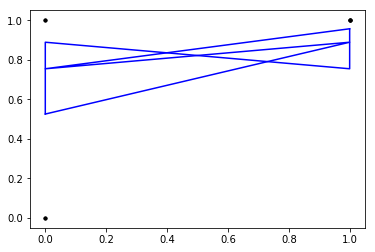

In [0]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b',x,y,'k.')

In [0]:
print(model.predict([7.5]))

[[63.608368]]


## logistic regression

In [0]:
x = np.arange(10) # 공부시간
y = np.array([0,0,0,0,0,0,1,1,1,1]) # 점수

# 7.5시간 공부 => 점수?

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
10/10 [==============================] - 1s 55ms/step - loss: 1.1632 - binary_accuracy: 0.5000
Epoch 2/300
10/10 [==============================] - 0s 12ms/step - loss: 0.9817 - binary_accuracy: 0.5000
Epoch 3/300
10/10 [==============================] - 0s 15ms/step - loss: 0.8364 - binary_accuracy: 0.5000
Epoch 4/300
10/10 [==============================] - 0s 11ms/step - loss: 0.7357 - binary_accuracy: 0.5000
Epoch 5/300
10/10 [==============================] - 0s 12ms/step - loss: 0.6768 - binary_accuracy: 0.5000
Epoch 6/300
10/10 [==============================] - 0s 11ms/step - loss: 0.6461 - binary_accuracy: 0.5000
Epoch 7/300
10/10 [==============================] - 0s 12ms/step - loss: 0.6301 - binary_accuracy: 0.5000
Epoch 8/300
10/10 [==============================] - 0s 11ms/step - loss: 0.6208 - binary_accuracy: 0.6000
Epoch 9/300
10/10 [==============================] - 0s 11ms/step - loss: 0.6144 - binary_accuracy: 0.6000
Epoch 10/300
10/10 [=================

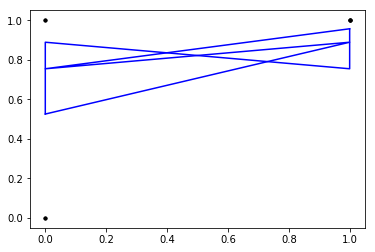

In [0]:
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b',x,y,'k.')

In [0]:
print(model.predict([7.5]))

[[0.8650446]]


In [0]:
x = np.array([[100,90,80],[55,45,36],[77,88,90]]) # 공부시간
y = np.array([92,70,88]) # 점수

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd = optimizers.SGD(lr=0.00001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
3/3 [==============================] - 0s 159ms/step - loss: 6675.9724 - mean_squared_error: 6675.9724
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 969.4546 - mean_squared_error: 969.4546
Epoch 3/300
3/3 [==============================] - 0s 4ms/step - loss: 545.3950 - mean_squared_error: 545.3950
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 498.8363 - mean_squared_error: 498.8363
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 485.9105 - mean_squared_error: 485.9105
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 477.5632 - mean_squared_error: 477.5632
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 470.2123 - mean_squared_error: 470.2123
Epoch 8/300
3/3 [==============================] - 0s 6ms/step - loss: 463.2005 - mean_squared_error: 463.2005
Epoch 9/300
3/3 [==============================] - 0s 5ms/step - loss: 456.3790 - mean_squared_error: 456.37

In [0]:
print(model.predict(x))

[[103.669655]
 [ 55.873928]
 [ 86.15998 ]]


## multi logistic regression

In [0]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]) # 공부시간
y = np.array([0,1,1,1]) # 점수

# 7.5시간 공부 => 점수?

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(x,y,batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 76ms/step - loss: 0.5320 - binary_accuracy: 0.7500
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5287 - binary_accuracy: 0.5000
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5256 - binary_accuracy: 0.5000
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5225 - binary_accuracy: 0.5000
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5195 - binary_accuracy: 0.5000
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5166 - binary_accuracy: 0.5000
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5137 - binary_accuracy: 0.5000
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5109 - binary_accuracy: 0.5000
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5081 - binary_accuracy: 0.5000
Epoch 10/300
4/4 [==============================] - 0s 4ms/step

In [0]:
print(model.predict(x))

[[0.52548736]
 [0.8887917 ]
 [0.75451624]
 [0.95686245]]


## softmax classification

# 텐서보드 생성

In [0]:
## 텐서 보드 생성.
from tensorboardcolab import * 
from datetime import datetime

current_time = str(datetime.now().timestamp())
train_log_dir = 'logs/tensorboard/train/' + current_time

tbc = TensorBoardColab(graph_path = train_log_dir) # To create a tensorboardcolab object it will automatically creat a link
writer = tbc.get_writer() # To create a FileWriter
writer.add_graph(tf.get_default_graph()) # add the graph 
writer.flush()


## 텐서 보드 생성.
from tensorboardcolab import * 


